In [1]:
### IMPORTS ###
# Quantum libraries:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

# Plotting
from matplotlib import pyplot as plt
import plotly

# Other
import os, sys
import time

import copy
import tqdm # Pretty progress bars
from IPython.display import Markdown, display # Better prints
import joblib # Writing and loading
from noisyopt import minimizeSPSA
import optuna # Automatic tuning tool

import multiprocessing

import warnings
warnings.filterwarnings("ignore", message="For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires.Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.")

##############

# My functions:
sys.path.insert(0, '../')
import vqe_functions as vqe
import qcnn_functions as qcnn


In [5]:
dev_vqe_mixed = qml.device("default.mixed", wires = N, shots = None)

In [6]:
epochs = 100
lr = 0.03
r_shift = 0.001
N = 4
l_steps = 10

vqe_circuit_fun = vqe.vqe_circuit
qcnn_circuit_fun = qcnn.qcnn_circuit

device = dev_vqe_mixed

In [7]:
## Load data:
data = joblib.load('../vqe_states_job/vqe_params_0noise.job')

print('Size of Data Set: {0}'.format(len(data)))

train_index = np.sort(np.random.choice(np.arange(len(data)), size=int(0.8*len(data)), replace=False ))
test_index = []

X_train, Y_train = [], []
X_test, Y_test   = [], []

for i in range(len(data)): 
    if i in train_index:
        X_train.append(data[i][0])
        Y_train.append(data[i][1])
    else:
        test_index.append(i)
        X_test.append(data[i][0])
        Y_test.append(data[i][1])
        
#X_train, Y_train = jnp.array(X_train), jnp.array(Y_train)
#X_test, Y_test   = jnp.array(X_test), jnp.array(Y_test)

print('______________________________')
print('Size of Training Set: {0}'.format(np.shape(X_train)[0]))
print('Size of Test Set    : {0}'.format(np.shape(X_test)[0]))


Size of Data Set: 100
______________________________
Size of Training Set: 80
Size of Test Set    : 20


In [8]:
N = 4
J = 1

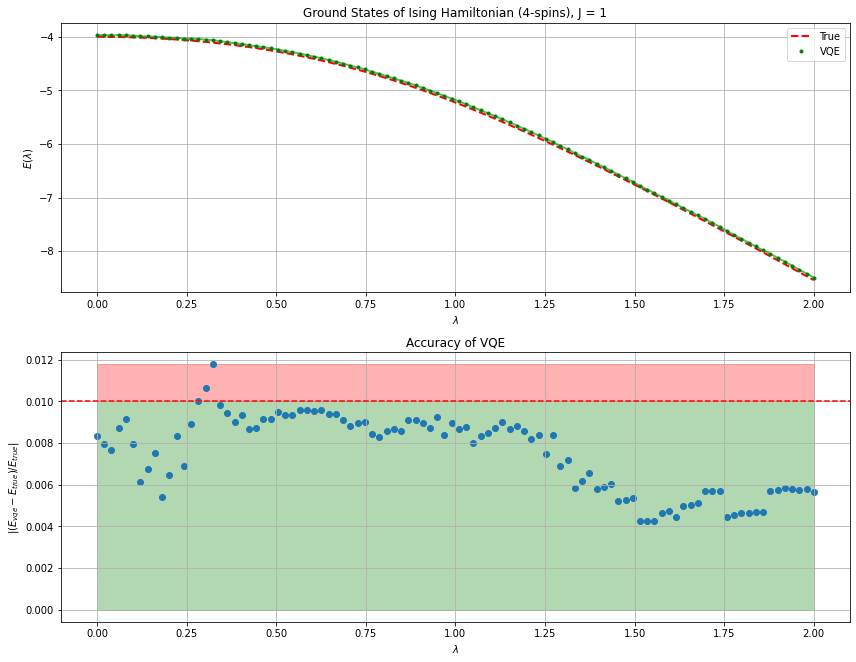

In [9]:
vqe.show_train_plots(data, N, J, dev_vqe_mixed, vqe.vqe_circuit)

(-0.5, 1.5)

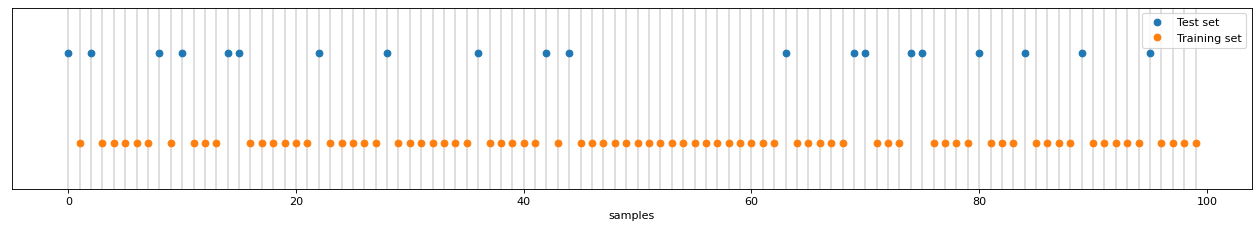

In [10]:
plt.figure(figsize=(20, 3), dpi=80)
for i in range(len(data)):
    plt.axvline(x=i,color ='gray', alpha = 0.3)
plt.plot(test_index, [1]*len(test_index), 'o', label = 'Test set')
plt.plot(train_index, [0]*len(train_index), 'o', label = 'Training set')
plt.legend()
plt.yticks([])
plt.xlabel('samples')
plt.ylim(-.5,1.5)


In [ ]:
loss_history, accuracy_history, params = qcnn.train(epochs, lr, r_shift, N, device, vqe_circuit_fun, qcnn_circuit_fun, 
          0, 0, 0, 0, X_train, Y_train, X_test = [], Y_test = [], plot = True, info = True, batch_size = 32)

***Parameters:***

a factor   = 0.03 ('a' coefficient of the optimizer)
r_shift    = 0.001 (c coefficient of the optimizer)
epochs     = 100 (# epochs for learning)
N          = 4 (Number of spins of the system)
batch_size = 32 (batch size of the training process)


Cost: 47.78441 | Accuracy: 85.0:   4%|▍         | 4/100 [00:02<01:07,  1.42it/s]

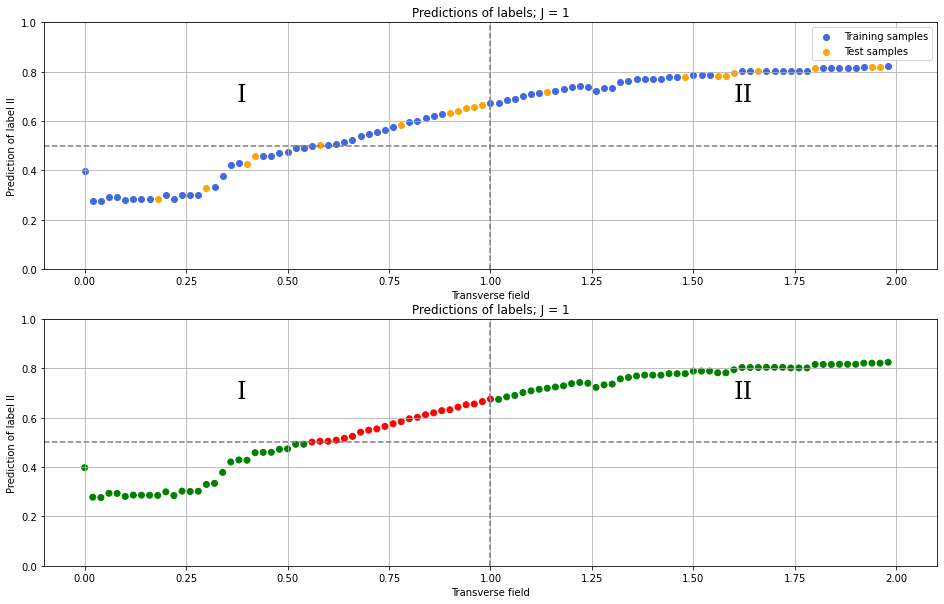

In [52]:
qcnn.plot_results_classification(data, train_index, params, N, device, vqe_circuit_fun, qcnn_circuit_fun,
                                vqe_conv_noise = 0, vqe_rot_noise = 0, qcnn_conv_noise = 0, qcnn_pool_noise = 0)